# ECS 171 - Homework 1
## OF CARS AND MEN [100 PT]
In this exercise, you will investigate the type of relationship that exists between the “miles pergallon” (mpg) rating of a car and several of its attributes.  For this task, you will use the “AutoMPG”  dataset  (“auto-mpg.data”  file;  398  cars,  9  features;  remove  the  6  records  with  missingvalues to end up with 392 samples) that is available in the UCI Machine Learning Repository:<br /><br />
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

## Q1
Assume that we want to classify the cars into 3 categories: low, medium and high mpg.
Find what the threshold for each category should be, so that all samples are divided into
three equally-sized bins. [10pt]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", names=columns, delim_whitespace=True)
# ? will get converted to NaN which will then be dropped
df = df.apply(pd.to_numeric, errors='coerce')
df = df.drop("car name", 1)
df = df.dropna(axis=0)
# sort values and then find threshold
df = df.sort_values("mpg").reset_index(drop=True)
t1 = df.mpg.quantile(0.33)
t2 = df.mpg.quantile(0.667)
print("Low-Medium Threshold: " + str(t1))
print("Medium-High Threshold: " + str(t2))
# place all cars into apppropriate mpg category
df["category"] = ""
df.loc[df.mpg <= t1, "category"] = "low"
df.loc[(df.mpg > t1) & (df.mpg <= t2), "category"] = "medium"
df.loc[df.mpg > t2, "category"] = "high"
low = df.loc[df.category == "low"]["category"].count() 
medium = df.loc[df.category == "medium"]["category"].count() 
high = df.loc[df.category == "high"]["category"].count() 
print("The size of each bin for (low, medium, high):")
print(low, medium, high)

Low-Medium Threshold: 18.503
Medium-High Threshold: 26.959400000000006
The size of each bin for (low, medium, high):
130 131 131


## Q2
Create a 2D scatterplot matrix, similar to that of Figure 1.4 in the ML book (K. Murphy,
page 6; also available on the lecture 1 slides - the figure with the flowers). You may use
any published code to perform this. Which pair from all pair-wise feature combinations
is the most informative regarding the three mpg categories? [10pt]

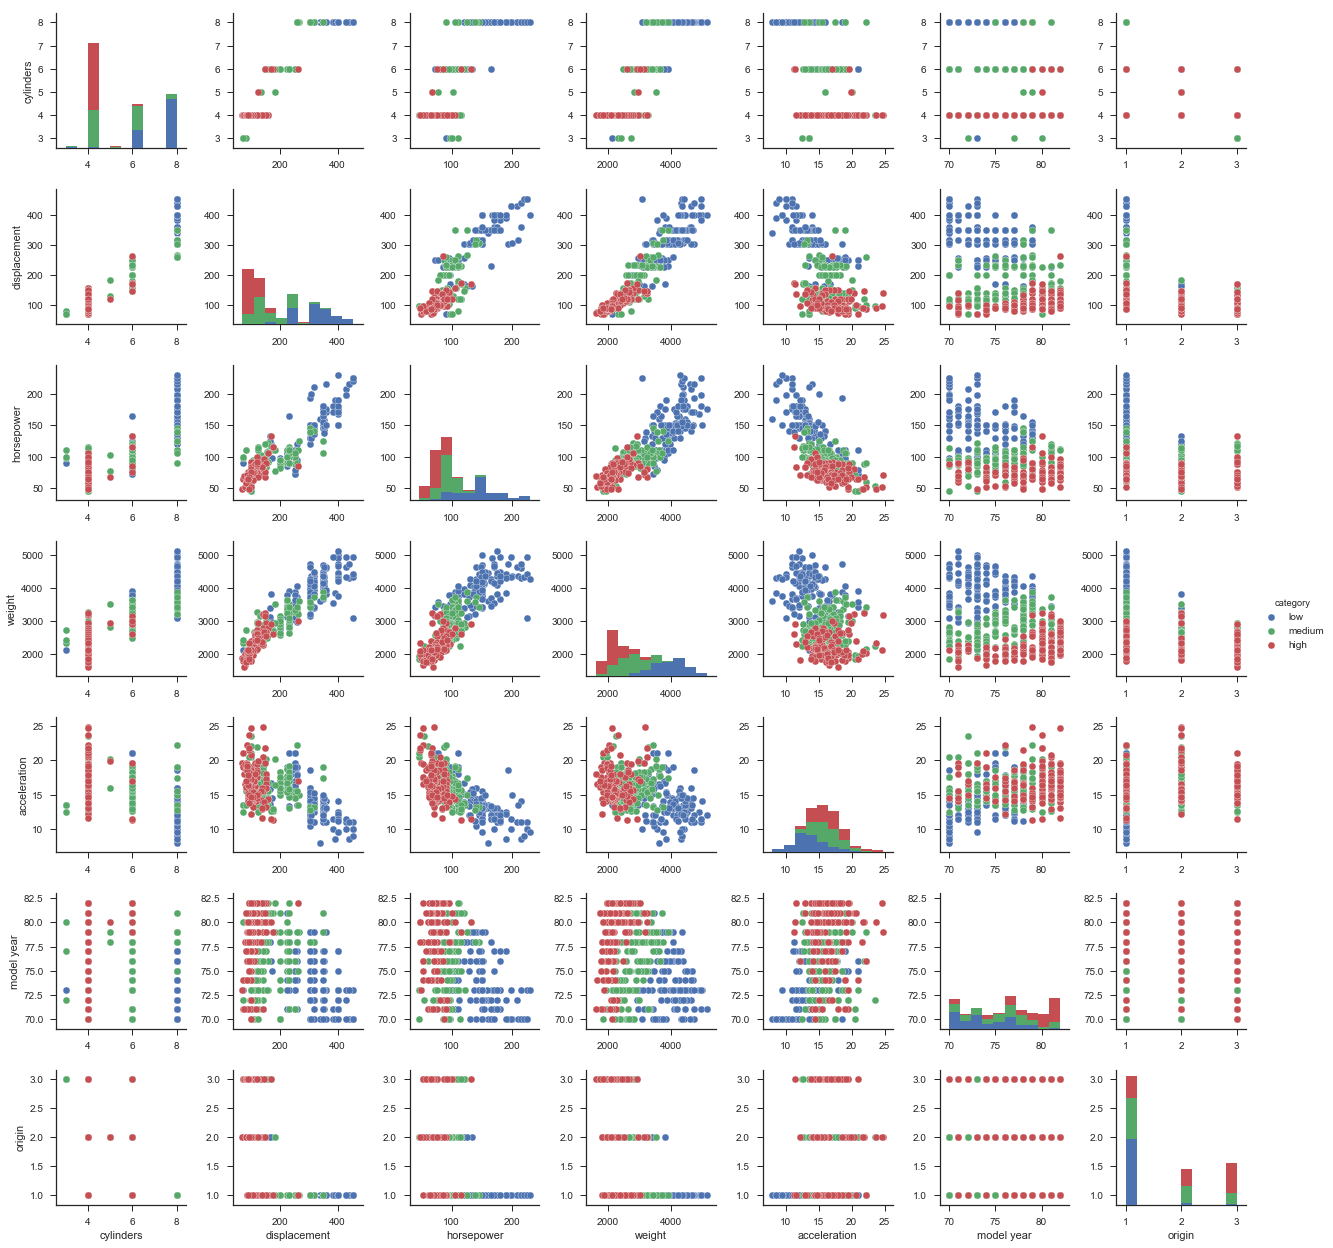

Best feature combinations: horsepower-weight, horsepower-acceleration, and weight-acceleration


In [2]:
import seaborn as sns

df_plot = df.drop("mpg", 1)
sns.set(style="ticks")
# passing in category for hue results in different color plots for each category
sns.pairplot(df_plot, hue="category")
plt.show()
print("Best feature combinations: horsepower-weight, horsepower-acceleration, and weight-acceleration")

## Q3
Write a linear regression solver that can accommodate polynomial basis functions on a
single variable for prediction of MPG. Your code should use the Ordinary Least Squares
(OLS) estimator (also the Maximum-likelihood estimator). Code it without using any existing
code. [20p]

In [3]:
# input: feature variable and order of polynomial
# output: return weights
def OLS(variable, order):
    Y = df.as_matrix(columns=df.columns[:1])
    X = np.full((df.shape[0], 1), 1)
    # building the input for polynomial regression
    for i in range(order):
        X = np.append(X, np.array(pd.DataFrame(df[variable]))**(i + 1), 1)
    W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return W
# Usage example below
# print(OLS("weight",2))

# input: order of polynomial, numpy array of training features and numpy array of ground truth
# output: return weights
# This function is used in later questions. Better suited than the previous function
def OLS2(order, x_set, y_set):
    Y = y_set
    X = np.full((x_set.shape[0], 1), 1)
    # building the input for polynomial regression
    for i in range(order):
        X = np.append(X, x_set**(i + 1), 1)
    W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return W
# Usage example below
# print(OLS2(2,np.array(pd.DataFrame(df["weight"])),np.array(pd.DataFrame(df["mpg"]))))

## Q4
Split the dataset in the first 300 samples for training and the rest 92 samples for testing.
Use your solver to regress for 0th to 4th order polynomial on a single independent variable
(feature) each time by using mpg as the dependent variable. Report (a) the training and
(b) the testing mean squared errors for each variable individually (except the “car name”
string variable, so a total of 7 features that are independent variables). Plot the lines and
data for the testing set, one plot per variable (so 5 lines in each plot, 7 plots total). Which
polynomial order performs the best in the test set? Which is the most informative feature
for mpg consumption in that case? [20pt]

Feature: cylinders
0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 24.9199564136
Testing set MSE: 21.3388292476
2-order polynomial: 
Training set MSE: 24.7399229883
Testing set MSE: 21.2130777685
3-order polynomial: 
Training set MSE: 22.7491454359
Testing set MSE: 18.930654865
4-order polynomial: 
Training set MSE: 22.6604253756
Testing set MSE: 19.5970461922


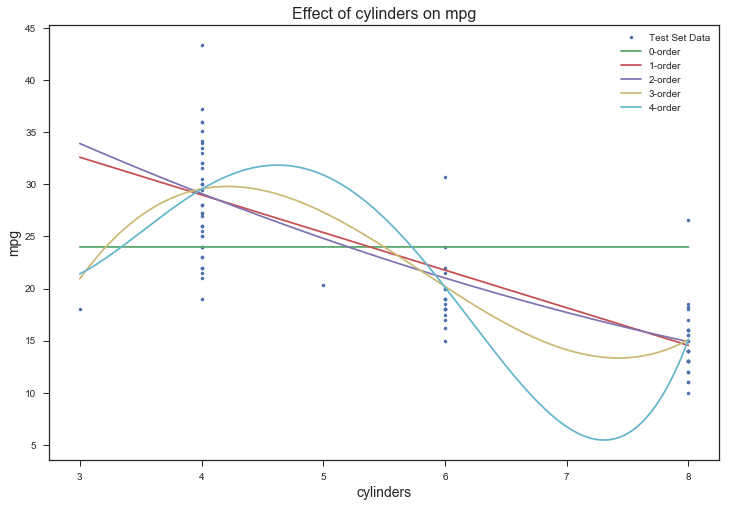

Feature: displacement
0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 21.5975099059
Testing set MSE: 21.044943989
2-order polynomial: 
Training set MSE: 19.2742418914
Testing set MSE: 17.9246249996
3-order polynomial: 
Training set MSE: 19.2571166715
Testing set MSE: 17.7973445626
4-order polynomial: 
Training set MSE: 19.2435332139
Testing set MSE: 17.8595237262


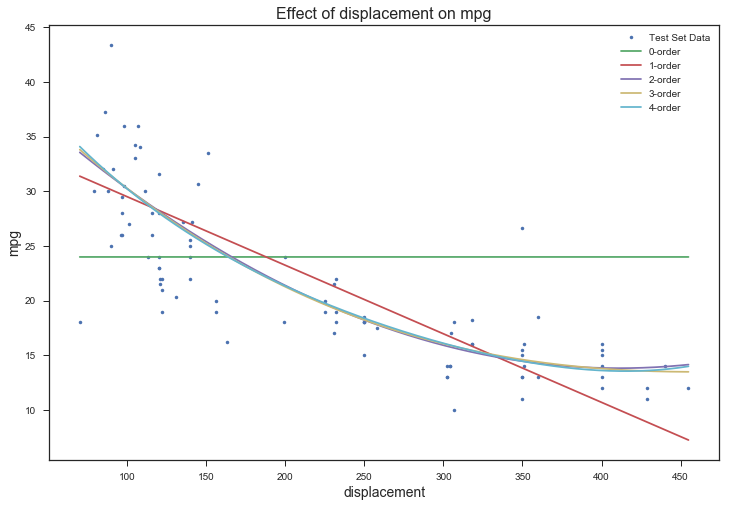

Feature: horsepower
0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 24.9194269248
Testing set MSE: 21.1095264446
2-order polynomial: 
Training set MSE: 19.8185176683
Testing set MSE: 16.5327889641
3-order polynomial: 
Training set MSE: 19.8021008897
Testing set MSE: 16.4387509257
4-order polynomial: 
Training set MSE: 19.7007921492
Testing set MSE: 16.5209195595


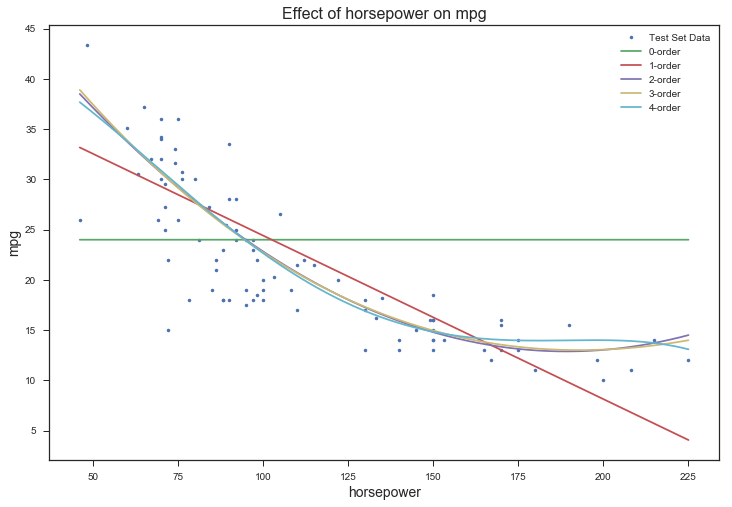

Feature: weight
0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 18.4464349639
Testing set MSE: 19.8048804406
2-order polynomial: 
Training set MSE: 17.1864674817
Testing set MSE: 17.8856742368
3-order polynomial: 
Training set MSE: 17.1837105808
Testing set MSE: 17.9016679911
4-order polynomial: 
Training set MSE: 17.1507753791
Testing set MSE: 17.9350079019


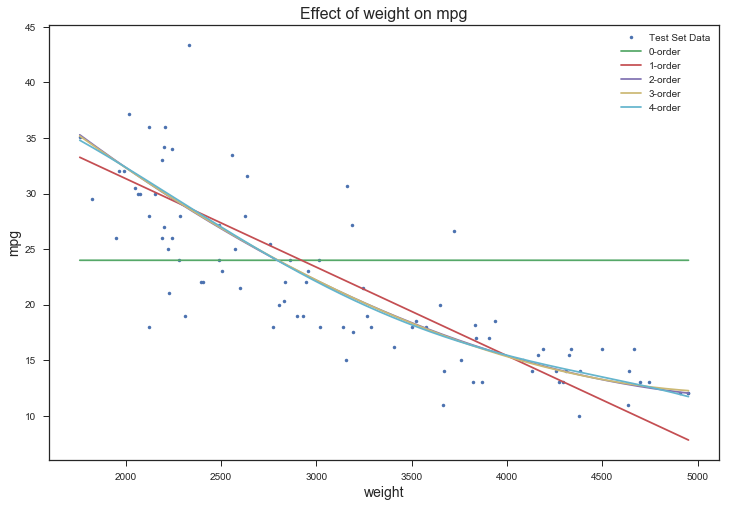

Feature: acceleration
0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 50.9592228319
Testing set MSE: 47.2694376964
2-order polynomial: 
Training set MSE: 50.0780869311
Testing set MSE: 46.2304163131
3-order polynomial: 
Training set MSE: 50.0326019642
Testing set MSE: 46.0158775682
4-order polynomial: 
Training set MSE: 48.7544658813
Testing set MSE: 45.9048694027


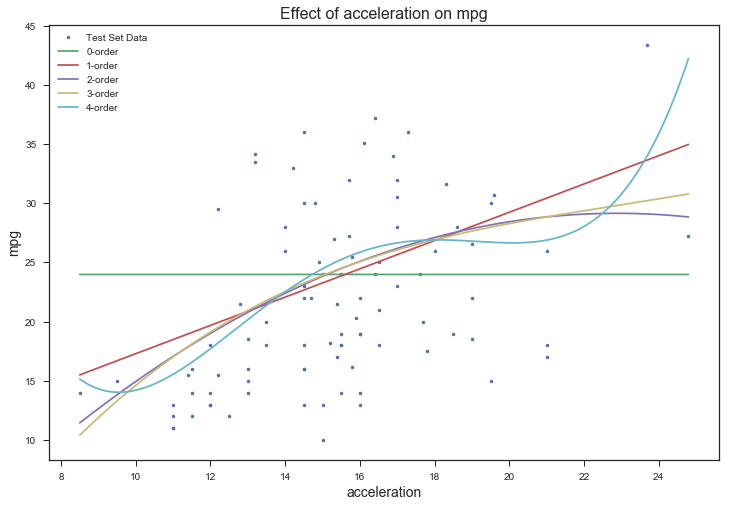

Feature: model year
0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 40.872038279
Testing set MSE: 38.8643928647
2-order polynomial: 
Training set MSE: 39.2518744432
Testing set MSE: 36.2277839667
3-order polynomial: 
Training set MSE: 39.225755981
Testing set MSE: 36.027427731
4-order polynomial: 
Training set MSE: 38.9953830831
Testing set MSE: 35.2181475911


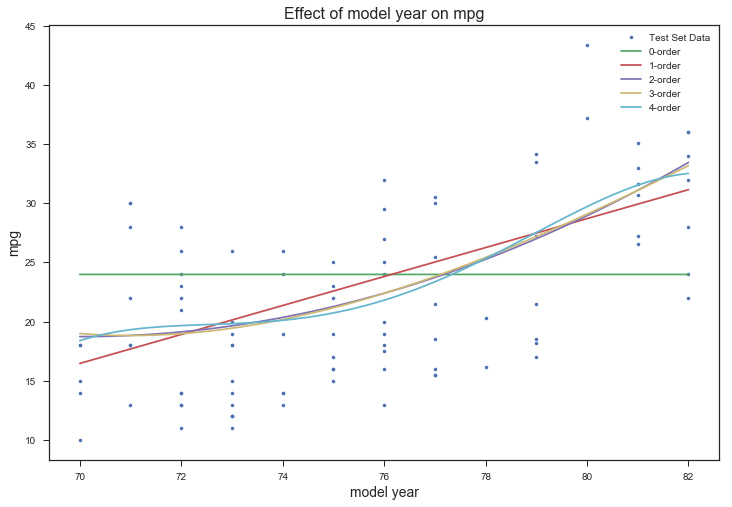

Feature: origin
0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 41.5448307371
Testing set MSE: 41.4705869075
2-order polynomial: 
Training set MSE: 40.9521341871
Testing set MSE: 40.295872614
3-order polynomial: 
Training set MSE: 3308.18804292
Testing set MSE: 3283.68311249
4-order polynomial: 
Training set MSE: 6072057.88062
Testing set MSE: 6253381.22486


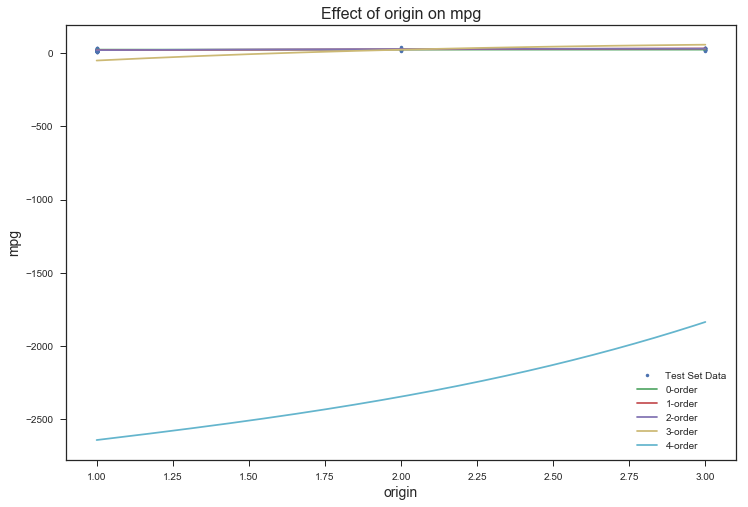

Over a few trials, it seems like 2-order, 3-order, and 4-order polynomials have the best performances on the test set.
The best features for predicting mpg consumption are cylinders, displacement, horsepower, and weight.
The results from each trial can vary because of randomization of test set



In [26]:
import numpy as np
from numpy.polynomial.polynomial import polyval

# data is randomized to get a more consistent distribution for training and test data
df_randomized = df.sample(frac=1).reset_index(drop=True)
# 300 rows for training set and 92 rows for testings set
training_set = df_randomized.loc[0:299]
testing_set = df_randomized.loc[300:391]
y_train = np.array(pd.DataFrame(training_set["mpg"]))
y_test = np.array(pd.DataFrame(testing_set["mpg"]))
column_names = df.loc[:0].drop({"mpg", "category"}, 1)
# iterate over each feature variable
for column in column_names:
    plt.figure(figsize=(12,8))
    x_train = np.array(pd.DataFrame(training_set[column]))
    x_test = np.array(pd.DataFrame(testing_set[column]))
    # draw scatter plot of testing data
    plt.plot(x_test, y_test, '.', label="Test Set Data")
    print("Feature: "+ column)
    # iterate for each order of polynomial
    for i in range(5):
        W = OLS2(i, x_train, y_train)
        x = np.arange(np.amin(x_test), np.amax(x_test), (np.amax(x_test) - np.amin(x_test)) / 100000)
        x = x.reshape(x.shape[0], 1)
        y = polyval(x, W)
        y = y.reshape(y.shape[1], 1)
        # plot polynomial function
        plt.plot(x, y, '-', label=str(i) + "-order")
        # find the mean squared error between predicted values and actual values for both test set and training set
        y_train2 = polyval(x_train, W)
        y_train2 = y_train2.reshape(y_train2.shape[1], 1)
        y_test2 = polyval(x_test, W)
        y_test2 = y_test2.reshape(y_test2.shape[1], 1)
        print (str(i) + "-order polynomial: ")
        print("Training set MSE: " + str(np.sum((y_train - y_train2)**2) / y_train.shape[0]))
        print("Testing set MSE: " + str(np.sum((y_test - y_test2)**2) / y_test.shape[0]))
    plt.ylabel("mpg", fontsize=14)
    plt.xlabel(column, fontsize=14)
    plt.title("Effect of " + column + " on mpg", fontsize=16)
    plt.legend()
    plt.show()    
print("Over a few trials, it seems like 2-order, 3-order, and 4-order polynomials have the best performances on the test set.")
print("The best features for predicting mpg consumption are cylinders, displacement, horsepower, and weight.")
print("The results from each trial can vary because of randomization of test set")
print("")


## Q5
Modify your solver to be able to handle second order polynomials of all 8 independent
variables simultaneously (i.e. 15 terms). Regress with 0th, 1st and 2nd order and report
(a) the training and (b) the testing mean squared error (MSE). Use the same 302/90 split.
[20pt]

In [27]:
# Multivariate version of OLS2
def OLS_Multi(order, x_set, y_set):
    Y = y_set
    X = np.full((x_set.shape[0], 1), 1)
    for i in range(order):
        X = np.append(X, x_set**(i + 1), 1)
    W = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return W

labels = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]
W = OLS_Multi(2,np.array(pd.DataFrame(df[labels])),np.array(pd.DataFrame(df["mpg"])))
x_train = np.array(pd.DataFrame(training_set[labels]))
x_test = np.array(pd.DataFrame(testing_set[labels]))
# iterate for each order polynomial
for i in range(3):
    W = OLS_Multi(i, x_train, y_train)
    X_train = np.full((x_train.shape[0], 1), 1)
    X_test = np.full((x_test.shape[0], 1), 1)
    # building the input for multivariate polynomial regression
    for j in range(i):
        X_train = np.append(X_train, x_train**(j + 1), 1)
        X_test = np.append(X_test, x_test**(j + 1), 1)
    y_train2 = np.dot(X_train, W)
    y_test2 = np.dot(X_test, W)

    print (str(i) + "-order polynomial: ")
    print("Training set MSE: " + str(np.sum((y_train - y_train2)**2) / y_train.shape[0]))
    print("Testing set MSE: " + str(np.sum((y_test - y_test2)**2) / y_test.shape[0]))

0-order polynomial: 
Training set MSE: 61.4088582222
Testing set MSE: 59.9233388792
1-order polynomial: 
Training set MSE: 10.7954542113
Testing set MSE: 11.2524664807
2-order polynomial: 
Training set MSE: 7.43609393954
Testing set MSE: 7.15411809544


## Q6
Using logistic regression (1st order) for low/medium/high classification. Report the training/
testing classification precision (you might want to look how precision is defined and
how it is calculated). [10pt]

In [12]:
from sklearn import linear_model

x_train = np.array(pd.DataFrame(training_set[labels]))
x_test = np.array(pd.DataFrame(testing_set[labels]))
y_train = np.array(pd.DataFrame(training_set["category"]))
y_test = np.array(pd.DataFrame(testing_set["category"]))
# scikit-learn library used for fitting and accuracy score
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train.ravel())
print("Training set accuracy: " + str(logreg.score(x_train, y_train)))
print("Test set accuracy: " + str(logreg.score(x_test, y_test)))

Training set accuracy: 0.84
Test set accuracy: 0.739130434783


## Q7
If a USA manufacturer (origin 1) had considered to introduce amodel in 1980 with the following
characteristics: 6 cylinders, 350 cc displacement, 180 horsepower, 3700 lb weight,
9 m/sec2 acceleration, what is the MPG rating that we should have expected? In which
mpg category (low,medium,high mpg) would it belong? Use second-order, multi-variate
polynomial and logistic regression. [10pt]

In [30]:
x_train = np.array(pd.DataFrame(training_set[labels]))
y_train = np.array(pd.DataFrame(training_set["mpg"]))
W = OLS_Multi(2, x_train, y_train)
input = np.array([1]).reshape(1,1)
# entered the values given for the features
features = np.array([6, 350, 180, 3700, 9, 80, 1]).reshape(1, 7)
# building the input for polynomial multivariate regression
for i in range(2):
    input = np.append(input, features**(i + 1), 1)
result = np.dot(input, W)
category = ""
if result <= t1:
    category = "low"
elif (result > t1) & (result <= t2):
    category = "medium"
elif result > t2:
    category = "high"

print("Second-order, multi-variate polynomial regression: ")
print("Predicted MPG rating - " + str(result[0,0]))
print("Predicted category - " + category)
print("Logistic regression: ")
print("Predicted category - " + logreg.predict(features)[0])

Second-order, multi-variate polynomial regression: 
Predicted MPG rating - 21.3441952047
Predicted category - medium
Logistic regression: 
Predicted category - low


## Q8
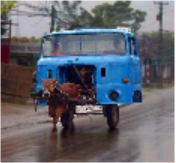
Predict the mpg of the vehicle in the photo. Clearly state your assumptions. [3pt bonus]

In [28]:
input = np.array([1]).reshape(1,1)
features = np.array([0, 0, 500, 2000, 1, 50, 1]).reshape(1, 7)
for i in range(2):
    input = np.append(input, features**(i + 1), 1)
result = np.dot(input, W)
category = ""
if result <= t1:
    category = "low"
elif (result > t1) & (result <= t2):
    category = "medium"
elif result > t2:
    category = "high"

print("Assumptions: cylinders: 0,", "displacement: 0,", "horsepower: 500,", "weight: 2000,", "acceleration: 1,", "model year: 50,", "origin: 1")
print("Second-order, multi-variate polynomial regression: ")
print("Predicted MPG rating - " + str(result[0,0]))
print("Predicted category - " + category)
print("Logistic regression: ")
print("Predicted category - " + logreg.predict(features)[0])

Assumptions: cylinders: 0, displacement: 0, horsepower: 500, weight: 2000, acceleration: 1, model year: 50, origin: 1
Second-order, multi-variate polynomial regression: 
Predicted MPG rating - 90.9725976113
Predicted category - high
Logistic regression: 
Predicted category - low
